# Aprendizaje no supervisado

Cuando se trata de problemas del mundo real, la mayoria de las veces, los datos no vienen con etiquetas predefinidas.

En el aprendizaje NO supervisado, los modelos se ajustan a las observaciones; no hay un conocimiento a priori, no hay un conjunto de entrenamiento del cual se conocen sus salidas correspondientes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

### Clasificacion (Clustering)

Podemos utilizar este tipo de aprendizaje para trabajar con agrupaciones de datos sin etiquetar, solo necesitamos sus caracteristicas y esperar que el modelo encuentre algun patron para realizar la clasificacion.

#### **Ejemplo:** *K-means*

- Conocido como el algoritmo de **Lloyd**
- El algoritmo divide un conjunto de datos de N muestras en `K` grupos separados
- Cada grupo descripto por la media de sus muestras, o *centroides*
- El objetivo del algoritmo es elegir estos **centroides** de forma de que se minimice la *inercia*, o *summa de cuadrados* dentro del grupo
    - La inercia asume que los conglomerados son **convexos*, lo que no siempre es así
    - Responde mal a grupos alargados o con multiples formas irregulares
- Tiene 3 pasos:
    1. Elige los centroides iniciales
    2. Asigna a cada muestra su centroide más cercano
    3. Crea nuevos centroides tomando el valor medio de todas las muestras asignadas al anterior
    4. Repite desde 2 hasta que la diferencia entre el nuevo centroide y el anterior es menor a un determinado umbral
- El algoritmo siempre convergerá, sin embargo, esto puede ser a un minimo local
    - Esto depende, en gran medida, de los centroides iniciales tomados
    - Por eso a menudo el calculo se realiza varias veces con diferentes inicializaciones
    - En `sklean` podemos utilizar el parametro `init` con el valor `k-means ++` para que la libreria se encargue de inicializar los centroides de forma de que estos esten distantes entre si, lo que lleva a resultados mejores

In [4]:
from sklearn.cluster import KMeans
from sklearn import datasets

Vamos a utilizar para el ejemplo el dataset `iris` que viene con `sklearn` a modo de ejemplo

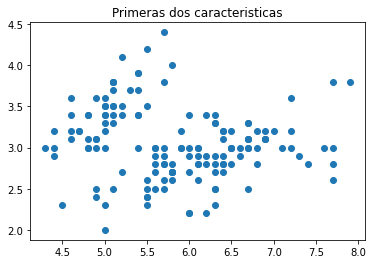

In [10]:
iris = datasets.load_iris()
data = iris.data  # Valores de las caracteristicas

plt.scatter(data[:, 0], data[:, 1])
plt.title("Primeras dos caracteristicas")
plt.show()

- Vizualizando las primeras dos caracteristicas del dataset

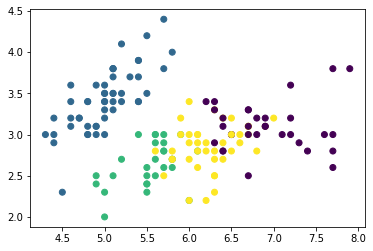

In [26]:
# Suponemos 4 centroides
classifier = KMeans(n_clusters=4, max_iter=2000)
classifier.fit(data)
predictions = classifier.predict(data)

plt.scatter(data[:, 0], data[:, 1], c=predictions)
plt.show()

In [27]:
score=metrics.adjusted_rand_score(iris.target, predictions)  # data.target son las clasificaciones reales
print("Porcentaje de coincidencia: ", score * 100, "%")

Porcentaje de coincidencia:  64.98176853819967 %


Podemos probar para distintas cantidades de centroides y ver cual de todos tiene el mayor porcentaje de aciertos

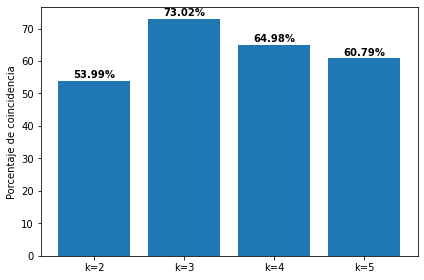

In [54]:
scores = []
all_predictions = []
for n in range(2, 6):
    classifier = KMeans(n_clusters=n, max_iter=2000)
    classifier.fit(data)
    predictions = classifier.predict(data)
    all_predictions.append(predictions)
    scores.append(metrics.adjusted_rand_score(iris.target, predictions)*100)
    
fig, ax = plt.subplots()

ax.set_ylabel("Porcentaje de coincidencia")

# Seteamos las separaciones del eje X
xticks = range(len(scores))
ax.set_xticks(xticks)

# Seteamos labels para los ticks del eje X
x_labels = [f"k={n}" for n in range(2, 6)]
ax.set_xticklabels(x_labels)

ax.bar(xticks, scores)

# Mostramos los valores arriba de las barras
for i, score in enumerate(scores):
    ax.text(i, score+1, s="%.2f%%" % score, ha="center", fontweight="bold")

plt.tight_layout()
plt.show()

- Observamos que con K=3 se obtiene el mayor porcentaje de coincidencia

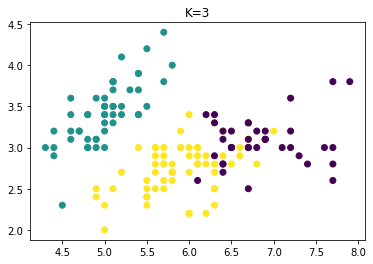

In [57]:
plt.title("K=3")
plt.scatter(data[:, 0], data[:, 1], c=all_predictions[1])
plt.show()